#  NLP Mini-Project: SMS Spam Analysis

Welcome! In this notebook, we'll explore fundamental NLP techniques using the **SMS Spam Collection** dataset.

We'll cover:
- Text cleaning
- Tokenization
- Stopword removal
- Lemmatization & Stemming
- Feature engineering
- WordClouds
- Rule-based classification
- PII redaction with spaCy


In [1]:
# Load dataset
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=['label', 'text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Step 1: Text Cleaning
- Lowercasing
- Removing punctuation and special characters

In [9]:
import re
df['clean_text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))
df[['text', 'clean_text']].head(10)

,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
5,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been weeks now ...
6,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...
8,WINNER!! As a valued network customer you have...,winner as a valued network customer you have b...
9,Had your mobile 11 months or more? U R entitle...,had your mobile months or more u r entitled t...


## Step 2: Tokenization, Stopword Removal, Lemmatization, and Stemming

In [12]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download resources (run only once)
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional for lemmatizer accuracy

# Initialize
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Example words
words = ['swimming', 'studies', 'happier', 'quickly', 'argued', 'apologetic', 'convincing', 'replying']

# Apply processing
lemmas = [lemmatizer.lemmatize(word, pos='v') for word in words]  # Use POS 'v' for verbs
stems = [stemmer.stem(word) for word in words]

# Display comparison
df_demo = pd.DataFrame({
    'Original Word': words,
    'Lemmatized (v)': lemmas,
    'Stemmed': stems
})

df_demo


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Original Word,Lemmatized (v),Stemmed
0,swimming,swim,swim
1,studies,study,studi
2,happier,happier,happier
3,quickly,quickly,quickli
4,argued,argue,argu
5,apologetic,apologetic,apologet
6,convincing,convince,convinc
7,replying,reply,repli


In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def process(text):
    tokens = word_tokenize(text)
    no_stop = [w for w in tokens if w not in stop_words]
    stemmed = [stemmer.stem(w) for w in no_stop]
    lemmatized = [lemmatizer.lemmatize(w) for w in no_stop]
    return pd.Series([no_stop, stemmed, lemmatized])

df[['tokens', 'stemmed', 'lemmatized']] = df['clean_text'].apply(process)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Step 3: Feature Engineering
We'll extract useful features to analyze message characteristics.

In [10]:
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['num_digits'] = df['text'].str.count(r'\d')
df['has_url'] = df['text'].str.contains(r'http|www|\.com', case=False)
df['uppercase_words'] = df['text'].apply(lambda x: sum(1 for w in x.split() if w.isupper()))
df.head(10)

,label,text,clean_text,tokens,stemmed,lemmatized,char_count,word_count,num_digits,has_url,uppercase_words,predicted_spam,redacted_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n...",111,20,0,False,0,False,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",29,6,0,False,0,False,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,"[free, entry, wkly, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,...",155,28,25,False,2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",49,11,0,False,2,False,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",61,13,0,False,1,False,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been weeks now ...,"[freemsg, hey, darling, weeks, word, back, id,...","[freemsg, hey, darl, week, word, back, id, lik...","[freemsg, hey, darling, week, word, back, id, ...",147,32,4,False,0,False,FreeMsg Hey there darling it's been <REDACTED>...
6,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",77,16,0,False,0,False,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...,"[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint...","[per, request, melle, melle, oru, minnaminungi...",160,26,1,False,0,False,As per your request '<REDACTED> (<REDACTED>)' ...
8,spam,WINNER!! As a valued network customer you have...,winner as a valued network customer you have b...,"[winner, valued, network, customer, selected, ...","[winner, valu, network, custom, select, receiv...","[winner, valued, network, customer, selected, ...",157,26,19,False,2,True,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...,had your mobile months or more u r entitled t...,"[mobile, months, u, r, entitled, update, lates...","[mobil, month, u, r, entitl, updat, latest, co...","[mobile, month, u, r, entitled, update, latest...",154,29,13,False,3,True,Had your mobile <REDACTED> or more? U R entitl...


## Step 4: WordCloud Visualization
We'll visualize the most frequent words in spam messages.

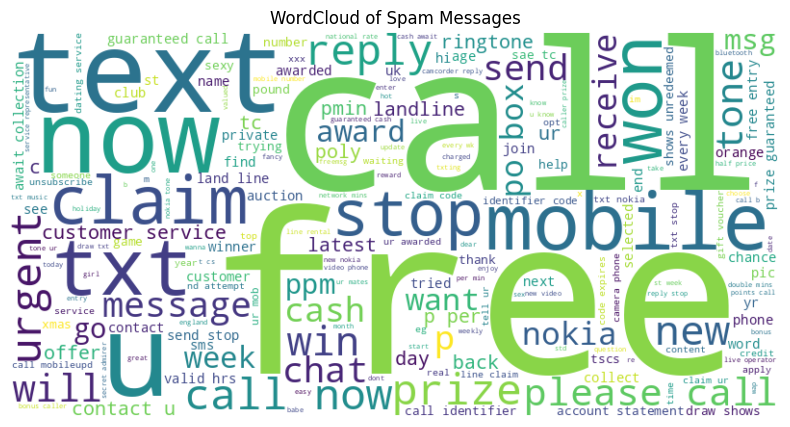

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(df[df['label'] == 'spam']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Spam Messages")
plt.show()

## Step 5: Rule-Based Spam Prediction
We'll use a simple heuristic model based on word count, digits, and URLs.

In [7]:
df['predicted_spam'] = (df['num_digits'] > 5) | (df['has_url']) | (df['uppercase_words'] > 3)
from sklearn.metrics import classification_report
print(classification_report(df['label'] == 'spam', df['predicted_spam']))

              precision    recall  f1-score   support

       False       0.98      0.95      0.97      4825
        True       0.74      0.88      0.81       747

    accuracy                           0.94      5572
   macro avg       0.86      0.92      0.89      5572
weighted avg       0.95      0.94      0.95      5572



## Step 6: Named Entity Recognition and PII Redaction
We'll use spacy to detect names, dates, phone numbers, and redact them.

In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")

def redact_entities(text):
    doc = nlp(text)
    redacted = text
    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'ORG', 'GPE', 'DATE', 'TIME', "LOC", "NORP", "FAC", "CARDINAL", "ORDINAL", "MONEY",]:  # common PII types
            redacted = redacted.replace(ent.text, "<REDACTED>")
    return redacted

df['redacted_text'] = df['text'].apply(redact_entities)
df[['text', 'redacted_text']].head(30)

,text,redacted_text
0,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in <REDACTED> a wkly comp to win FA...
3,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro..."
5,FreeMsg Hey there darling it's been 3 week's n...,FreeMsg Hey there darling it's been <REDACTED>...
6,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me. ...
7,As per your request 'Melle Melle (Oru Minnamin...,As per your request '<REDACTED> (<REDACTED>)' ...
8,WINNER!! As a valued network customer you have...,WINNER!! As a valued network customer you have...
9,Had your mobile 11 months or more? U R entitle...,Had your mobile <REDACTED> or more? U R entitl...
